In [1]:
import lmdb
from pathlib import Path
from random import sample
from io import BytesIO
from PIL import Image

In [2]:
# Open the LMDB database
env = lmdb.open(
    str(Path("data") / "DocTamperV1-SCD"),
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False
)

def list_files_codes(env: lmdb.Environment):
    '''
    List files awailable in the lmdb.Environment.

    Parameters
    ----------
    env: lmdb.Environment
        Environment from wich files must me loaded.
    '''
    with env.begin(write=False) as txn:
        with txn.cursor() as cursor:
            decoded: list[str] = [key.decode('utf-8') for key, _ in cursor]
            image_predix = "image-"
            return [
                name[len(image_predix):] 
                for name in decoded if name.startswith(image_predix)
            ]

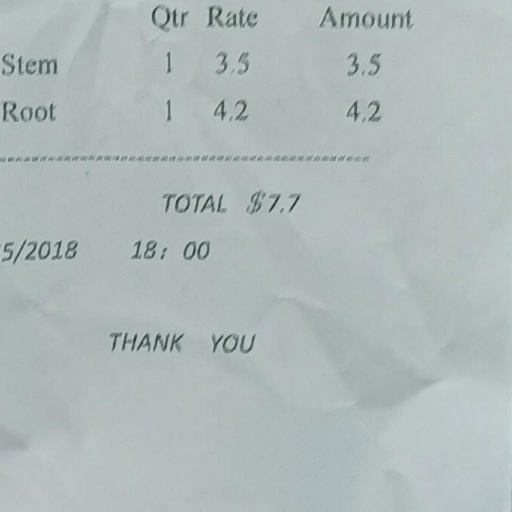

In [5]:
with env.begin(write=False) as txn:
    img_buf = txn.get('image-000000165'.encode('utf-8'))
    label_buf = txn.get('label-000000165'.encode('utf-8'))

Image.open(BytesIO(img_buf))

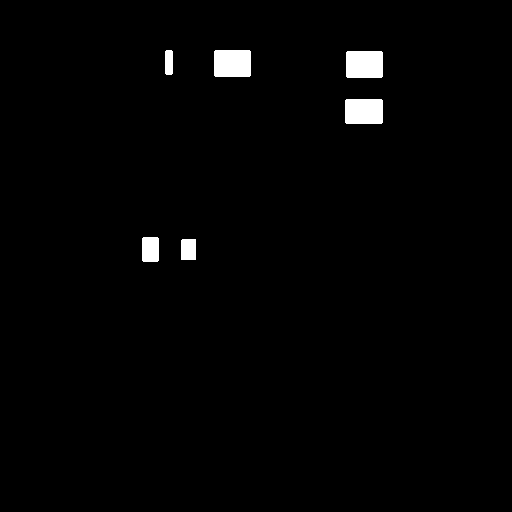

In [6]:
Image.open(BytesIO(label_buf))